# 🟦 単回帰分析

「目的変数1つに対して、説明変数が1つ」の回帰分析

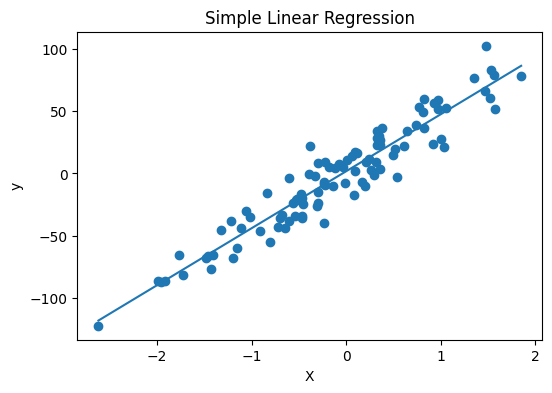

偏回帰係数: [45.78520483]
切片: 1.7476729807904583
決定係数 R^2: 0.9069446121516956


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np

# データ生成
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# モデル学習
model = LinearRegression()
model.fit(X, y)

# 回帰直線用データ
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_line)

# 可視化
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.plot(x_line, y_pred)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple Linear Regression")
plt.show()

print("偏回帰係数:", model.coef_)
print("切片:", model.intercept_)
print("決定係数 R^2:", model.score(X, y))





### 🟠 make_regression

* 役割：回帰用のサンプルデータを生成する関数
* 主な引数
  * `n_samples`：サンプル数
  * `n_features`：特徴量数
  * `noise`：ノイズの大きさ
  * `random_state`：乱数の固定
* 返り値
  * `X`：説明変数
  * `y`：目的変数

### 🟠 np.linspace
  
役割：指定した範囲を等間隔に区切った配列を作る関数

### 🟠 model.fit

* 役割：与えたデータでモデルを学習させるメソッド
* 引数
  * `X`：説明変数
  * `y`：目的変数
* 返り値
  * 学習済みのモデル自身

### 🟠 model.predict

* 役割：学習済みモデルで予測値を計算するメソッド
* 引数
  * `X_new`：予測したい説明変数
* 返り値
  * 予測値
 
### 🟠 その他の用語

- 偏回帰係数
  - 重回帰分析で、他の説明変数の影響を一定に保ったうえで、特定の説明変数が目的変数に与える影響の大きさを示す係数。
- 決定係数
    - 回帰モデルがデータの変動をどれだけ説明できているかを示す指標。
    - 0〜1の範囲で、1に近いほど説明力が高い。

# 🟦 最小２乗法

* 観測データに最も「よく合う」直線や曲線を求めるための手法
* 単回帰分析を行う方法の１つ
* 「実際の値 − 予測値」の差を 誤差 とし、その誤差を二乗して合計した値が最小になるように 係数（傾きや切片）を選ぶ。
* 

# 🟦 重回帰分析

「目的変数1つに対して、説明変数が2つ以上」の回帰分析

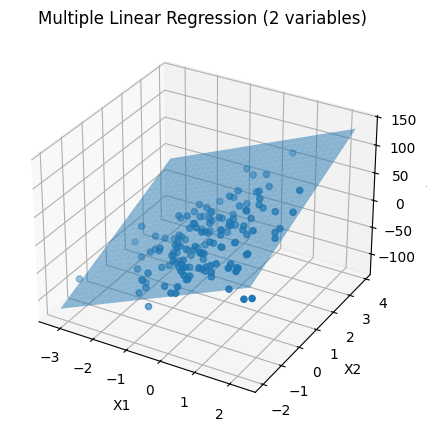

偏回帰係数: [25.98663059 18.81340604]
切片: 1.303727716950877
決定係数 R^2: 0.7336817275571942


In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データ生成（特徴量2つ）
X, y = make_regression(n_samples=150, n_features=2, noise=20, random_state=42)

# モデル学習
model = LinearRegression()
model.fit(X, y)

# 回帰平面の描画用メッシュ
x1_range = np.linspace(X[:,0].min(), X[:,0].max(), 30)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred_grid = model.predict(X_grid).reshape(x1_grid.shape)

# 可視化
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:,0], X[:,1], y)
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.title("Multiple Linear Regression (2 variables)")

plt.show()

print("偏回帰係数:", model.coef_)
print("切片:", model.intercept_)
print("決定係数 R^2:", model.score(X, y))
